In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random
import os

In [2]:
cc = pd.read_csv("C:/Users/merli/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
cc.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
cc.shape

(7043, 21)

In [5]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Select object columns
obj_cols = cc.select_dtypes(include=['object']).columns
missing_summary = {}

for col in obj_cols:
    # Count NaN values
    nan_count = cc[col].isna().sum()
    blank_count = cc[col].apply(lambda x: isinstance(x, str) and x.strip() == '').sum()
    total_missing = nan_count + blank_count
    missing_summary[col] = {
        'NaN_count': nan_count,
        'Blank_string_count': blank_count,
        'Total_missing': total_missing
    }

# Convert summary to DataFrame for nicer display
missing_summary_df = pd.DataFrame(missing_summary).T

print(missing_summary_df)


                  NaN_count  Blank_string_count  Total_missing
customerID                0                   0              0
gender                    0                   0              0
Partner                   0                   0              0
Dependents                0                   0              0
PhoneService              0                   0              0
MultipleLines             0                   0              0
InternetService           0                   0              0
OnlineSecurity            0                   0              0
OnlineBackup              0                   0              0
DeviceProtection          0                   0              0
TechSupport               0                   0              0
StreamingTV               0                   0              0
StreamingMovies           0                   0              0
Contract                  0                   0              0
PaperlessBilling          0                   0        

In [7]:
cc['TotalCharges'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [8]:
missing_total_charges = cc[cc['TotalCharges'].astype(str).str.strip() == '']
print("Number of rows with blank TotalCharges:", len(missing_total_charges))

Number of rows with blank TotalCharges: 11


In [9]:
# Convert TotalCharges to numeric
cc['TotalCharges'] = cc['TotalCharges'].replace(' ', np.nan)
cc['TotalCharges'] =cc['TotalCharges'].astype(float)
# Fill NaN values with 0
cc['TotalCharges'] = cc['TotalCharges'].fillna(0)


In [10]:
missing_total_charges = cc[cc['TotalCharges'].astype(str).str.strip() == '']
print("Number of rows with blank TotalCharges:", len(missing_total_charges))

Number of rows with blank TotalCharges: 0


In [11]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
cc[['OnlineBackup']].value_counts()

OnlineBackup       
No                     3088
Yes                    2429
No internet service    1526
dtype: int64

In [13]:
cc[['gender','Partner','SeniorCitizen']].value_counts()

gender  Partner  SeniorCitizen
Male    No       0                1592
Female  No       0                1480
        Yes      0                1440
Male    Yes      0                1389
                 1                 325
Female  No       1                 320
Male    No       1                 249
Female  Yes      1                 248
dtype: int64

In [14]:
vc = cc['gender'].value_counts()
difference = abs(vc.iloc[0] - vc.iloc[1])
print("Difference in count:", difference)

Difference in count: 67


In [15]:
cc.drop(columns=['customerID'], inplace = True)


In [16]:
cc.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
from sklearn.model_selection import train_test_split
X = cc.drop('Churn', axis=1)
y = cc['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
cols_to_clean = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies','MultipleLines' ]

for col in cols_to_clean:
    X_train[col] = X_train[col].replace({'No internet service': 'No','No phone service': 'No'} )
    X_test[col] = X_test[col].replace({'No internet service': 'No', 'No phone service': 'No'})

In [19]:
from sklearn.preprocessing import LabelEncoder

# One-hot encode nominal features
one_hot_cc = ['gender','Partner', 'Dependents', 'PhoneService','MultipleLines', 'PaymentMethod', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling','Contract']
X_train = pd.get_dummies(X_train, columns=one_hot_cc, drop_first=True)
X_test = pd.get_dummies(X_test, columns=one_hot_cc, drop_first=True)

# Align columns of test set with train set (important if one-hot creates mismatch)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
   
# Encode y_train and y_test (Churn)
le_y = LabelEncoder()
y_train = le_y.fit_transform(y_train)  # y is usually a Series
y_test = le_y.transform(y_test)


In [20]:
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,PaymentMethod_Credit card (automatic),...,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,Contract_One year,Contract_Two year
2142,0,21,64.85,1336.80,0,0,1,1,0,0,...,0,1,0,1,0,0,1,0,1,0
1623,0,54,97.20,5129.45,0,0,0,1,1,0,...,0,0,1,0,0,1,1,1,0,1
6074,0,1,23.45,23.45,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1362,0,4,70.20,237.95,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6754,0,0,61.90,0.00,1,0,1,1,1,0,...,0,1,1,0,1,0,0,1,0,1


In [21]:
print(y_train[:2])

[0 0]


In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 2142 to 860
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          5634 non-null   int64  
 1   tenure                                 5634 non-null   int64  
 2   MonthlyCharges                         5634 non-null   float64
 3   TotalCharges                           5634 non-null   float64
 4   gender_Male                            5634 non-null   uint8  
 5   Partner_Yes                            5634 non-null   uint8  
 6   Dependents_Yes                         5634 non-null   uint8  
 7   PhoneService_Yes                       5634 non-null   uint8  
 8   MultipleLines_Yes                      5634 non-null   uint8  
 9   PaymentMethod_Credit card (automatic)  5634 non-null   uint8  
 10  PaymentMethod_Electronic check         5634 non-null   uint8  
 11  Pa

In [23]:
print(X_train.columns.tolist())


['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'Contract_One year', 'Contract_Two year']


In [24]:
# re-order the index
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train = pd.Series(y_train).reset_index(drop=True)
y_test = pd.Series(y_test).reset_index(drop=True)

In [25]:
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,PaymentMethod_Credit card (automatic),...,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,Contract_One year,Contract_Two year
0,0,21,64.85,1336.80,0,0,1,1,0,0,...,0,1,0,1,0,0,1,0,1,0
1,0,54,97.20,5129.45,0,0,0,1,1,0,...,0,0,1,0,0,1,1,1,0,1
2,0,1,23.45,23.45,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,4,70.20,237.95,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,61.90,0.00,1,0,1,1,1,0,...,0,1,1,0,1,0,0,1,0,1


In [26]:
train_data = X_train.copy()

In [27]:
train_data['churn'] = y_train

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          5634 non-null   int64  
 1   tenure                                 5634 non-null   int64  
 2   MonthlyCharges                         5634 non-null   float64
 3   TotalCharges                           5634 non-null   float64
 4   gender_Male                            5634 non-null   uint8  
 5   Partner_Yes                            5634 non-null   uint8  
 6   Dependents_Yes                         5634 non-null   uint8  
 7   PhoneService_Yes                       5634 non-null   uint8  
 8   MultipleLines_Yes                      5634 non-null   uint8  
 9   PaymentMethod_Credit card (automatic)  5634 non-null   uint8  
 10  PaymentMethod_Electronic check         5634 non-null   uint8  
 11  Paym

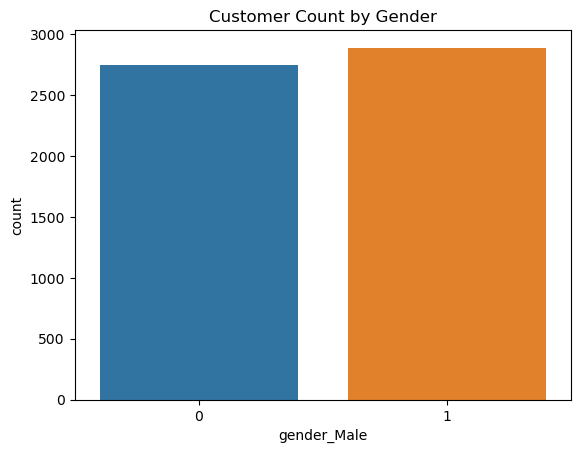

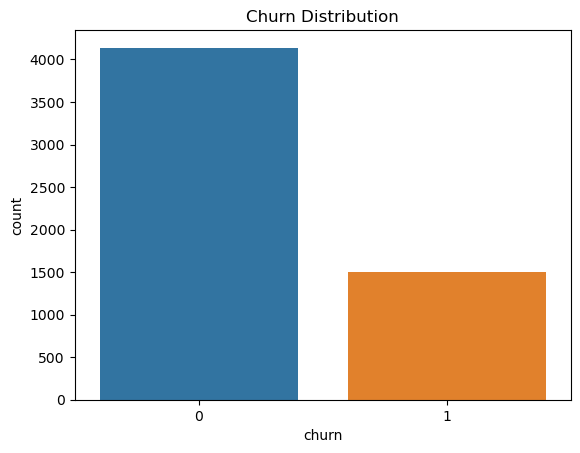

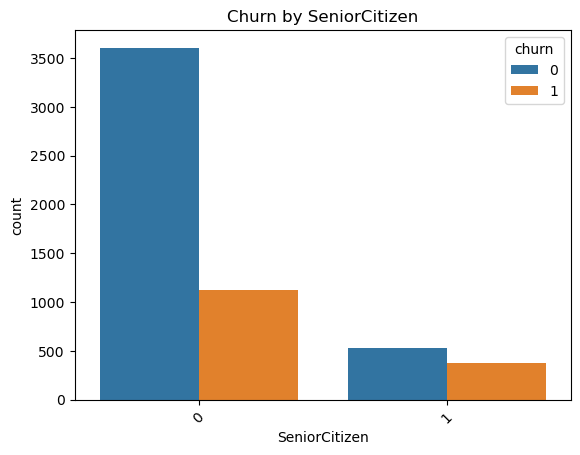

In [29]:
# Countplot for gender
sn.countplot(x='gender_Male', data=train_data)
plt.title('Customer Count by Gender')
plt.show()

# Countplot for churn (target variable)
sn.countplot(x='churn', data=train_data)
plt.title('Churn Distribution')
plt.show()

# Countplot with hue
sn.countplot(x='SeniorCitizen', hue='churn', data=train_data)
plt.title('Churn by SeniorCitizen')
plt.xticks(rotation=45)
plt.show()


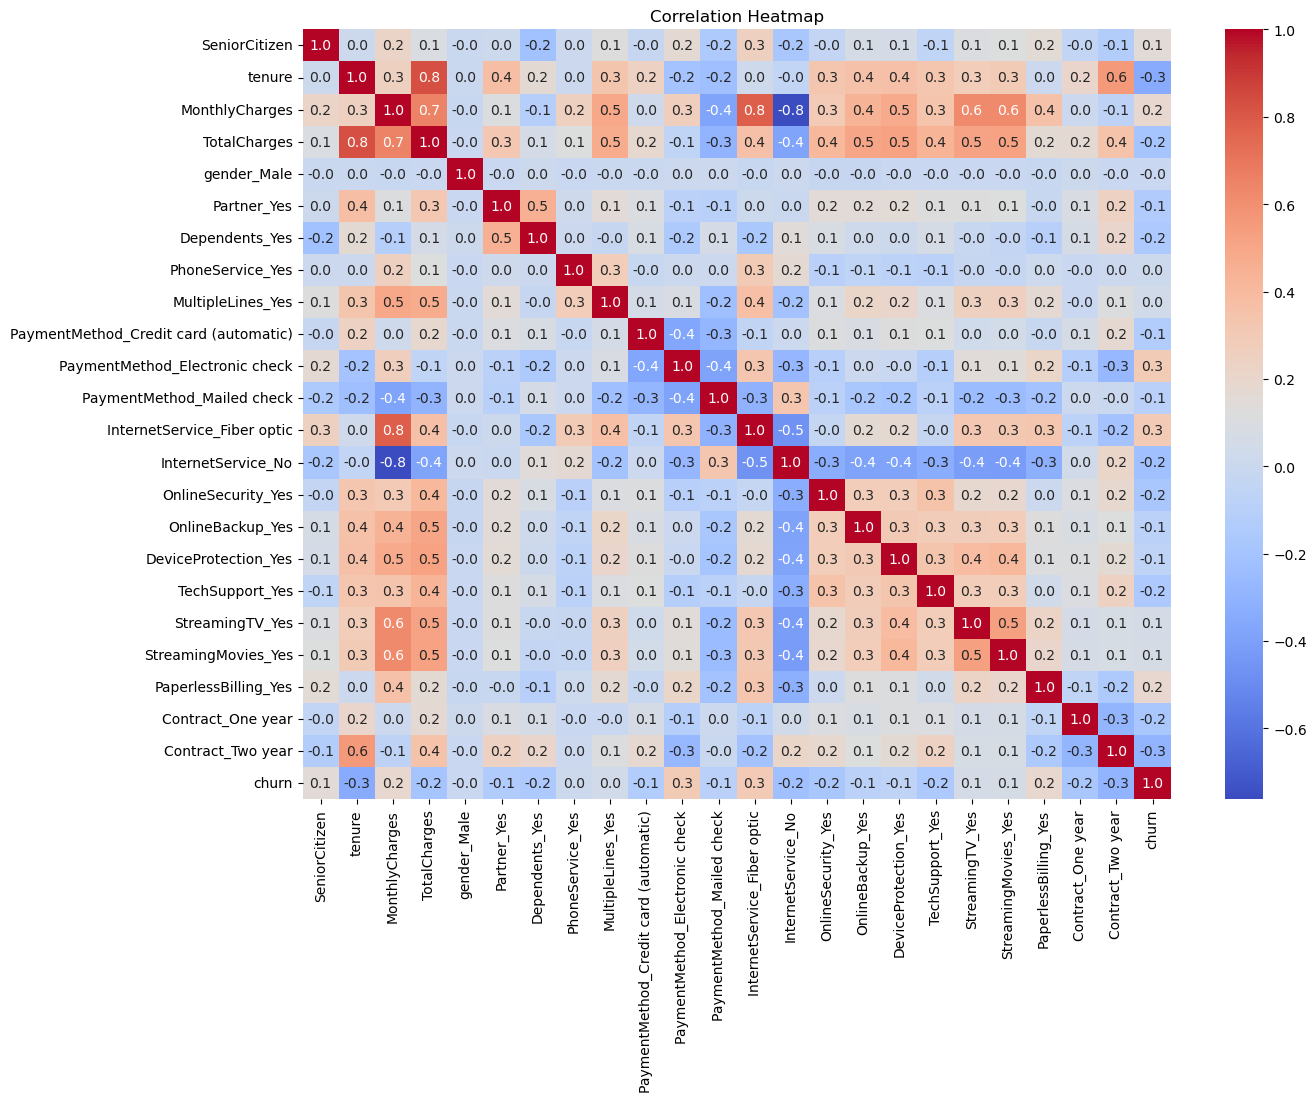

In [30]:
#Heatmap to visulaize the correlation between features.
plt.figure(figsize=(14, 10))
corr_matrix = train_data.corr()
sn.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

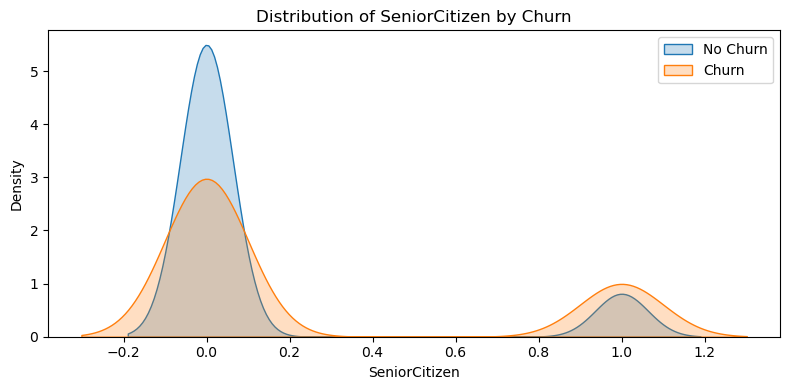

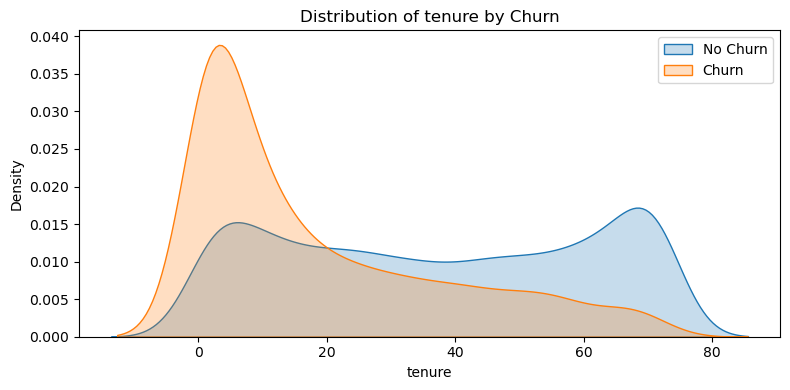

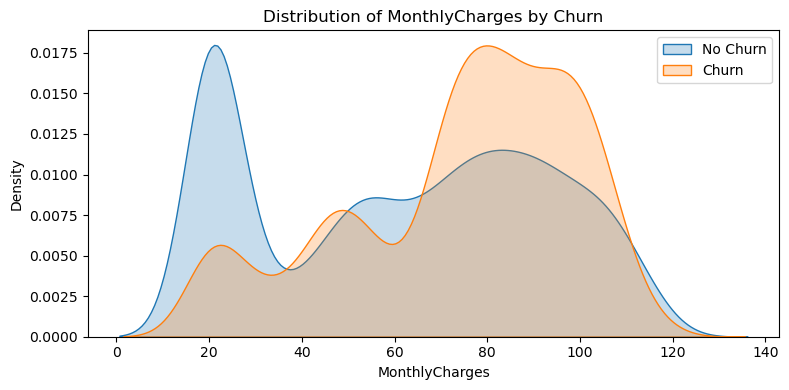

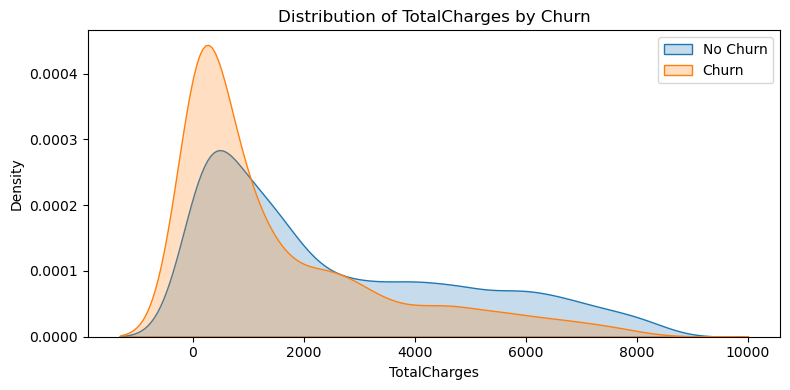

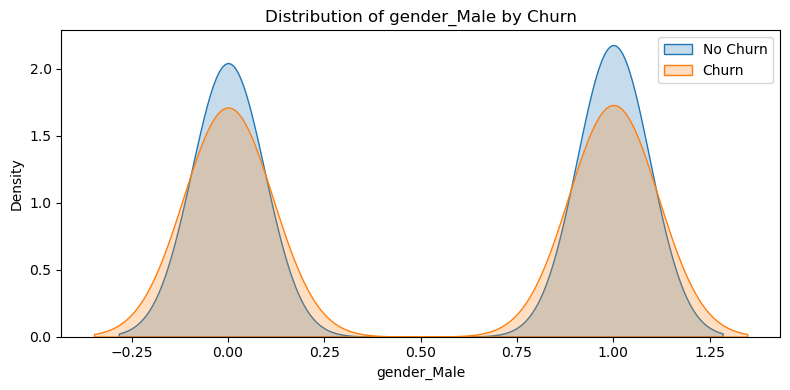

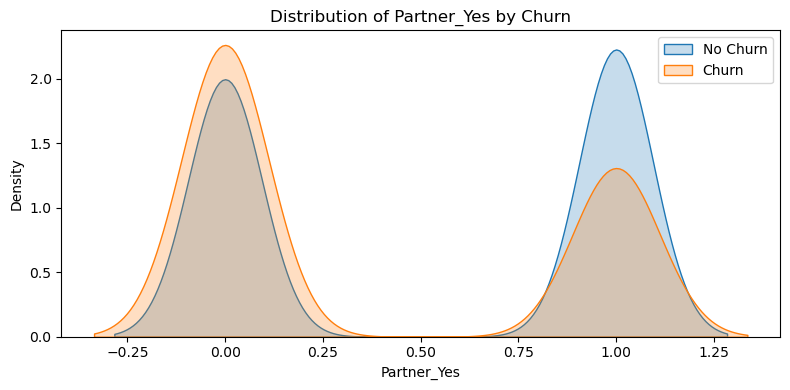

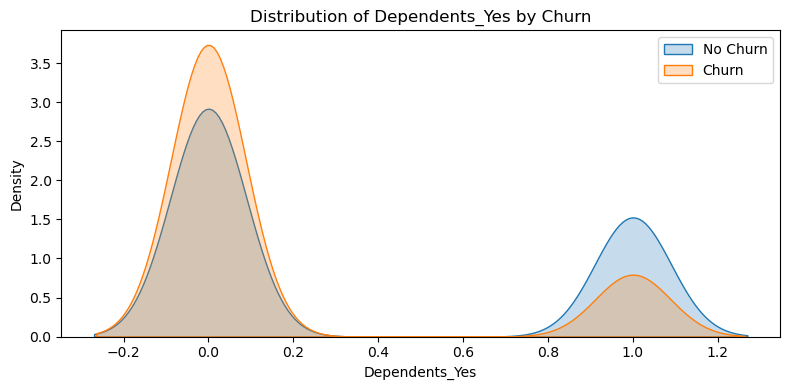

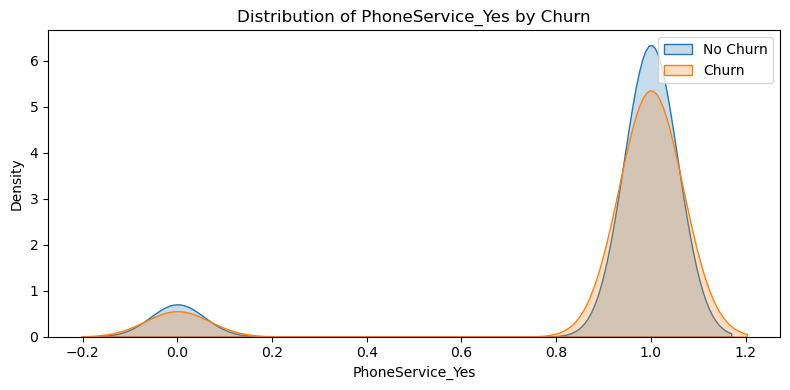

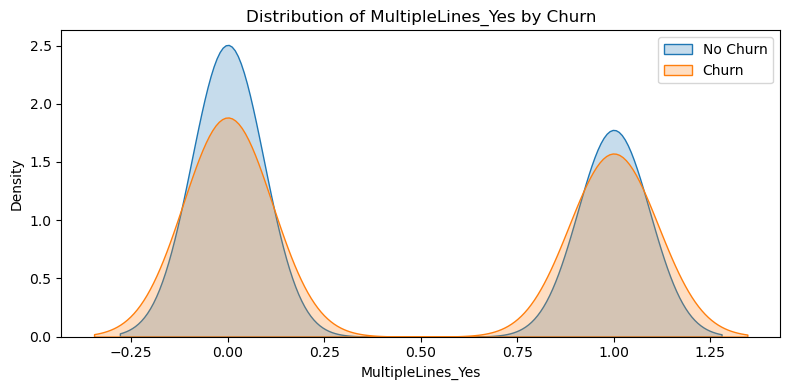

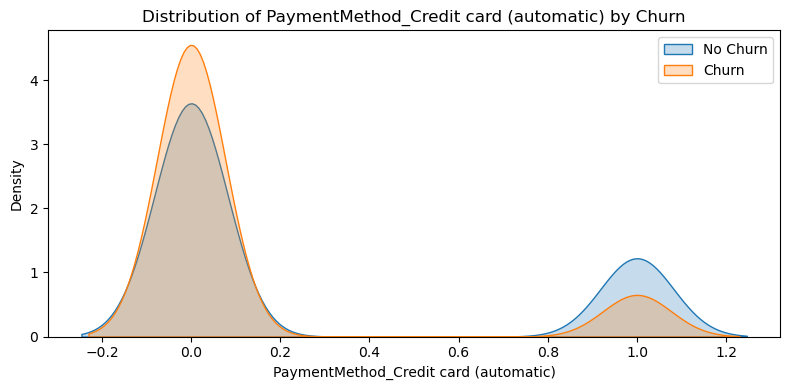

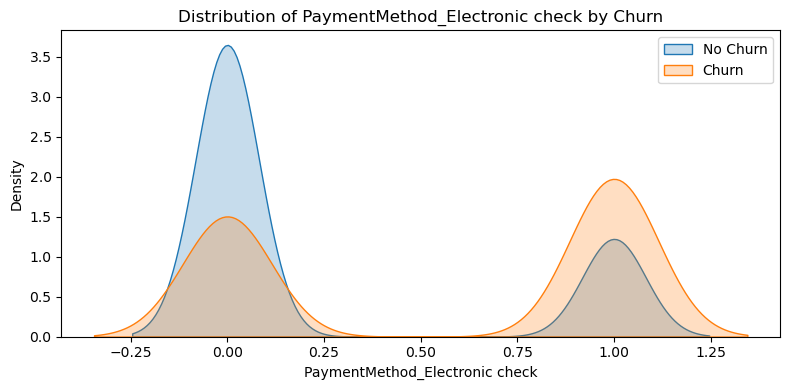

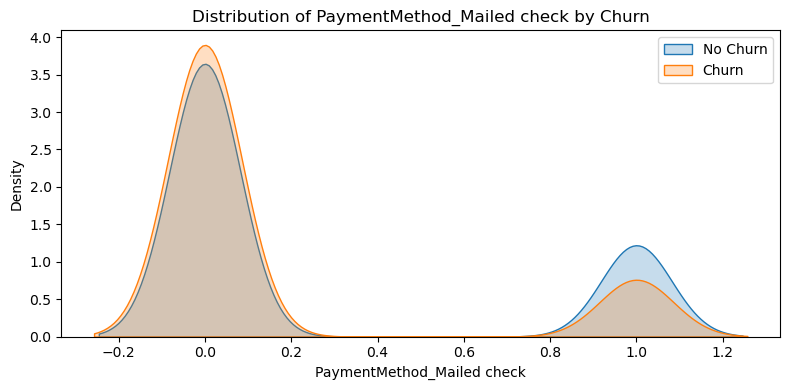

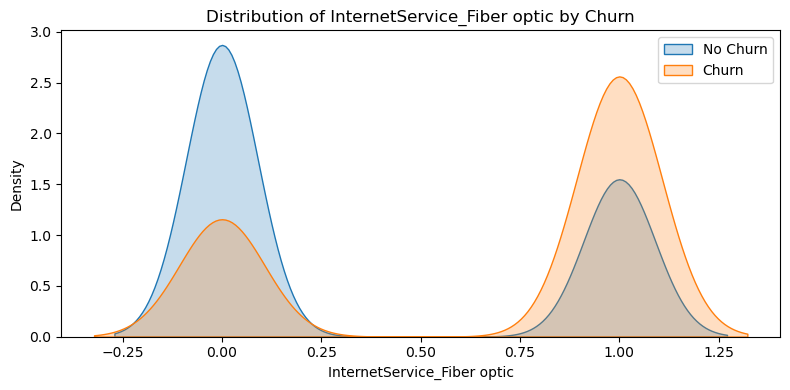

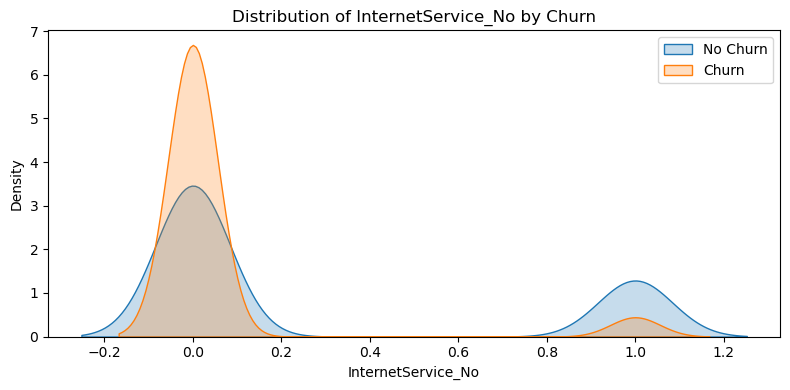

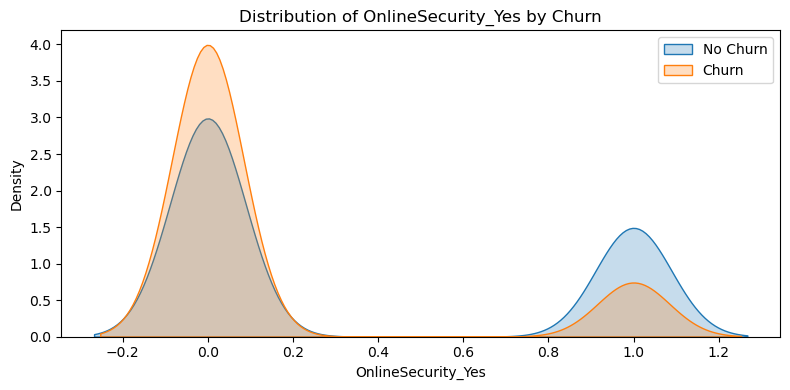

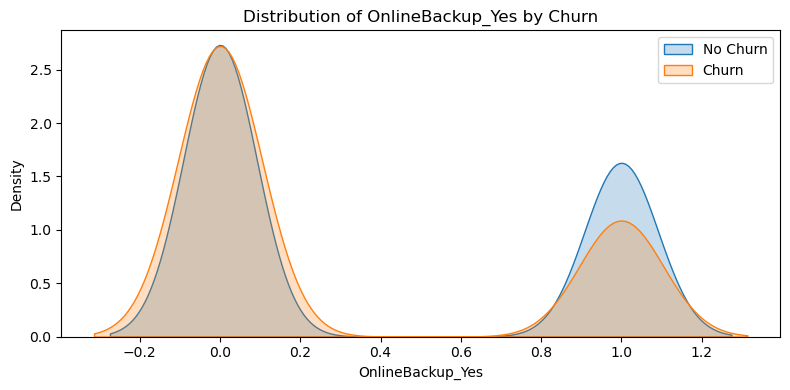

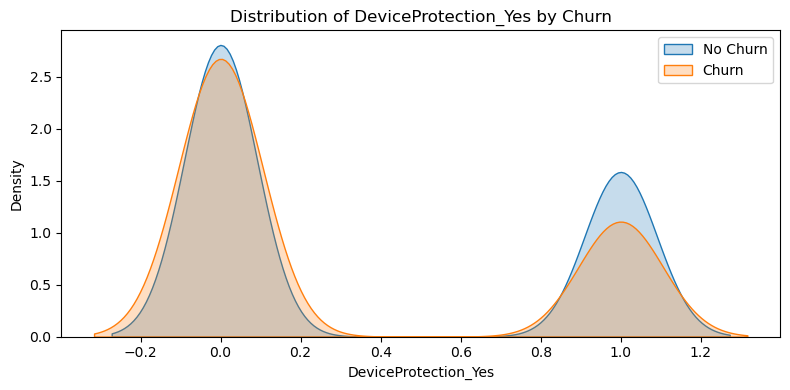

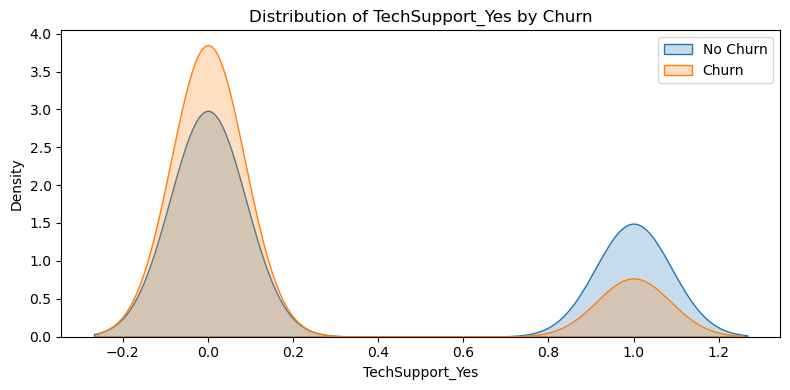

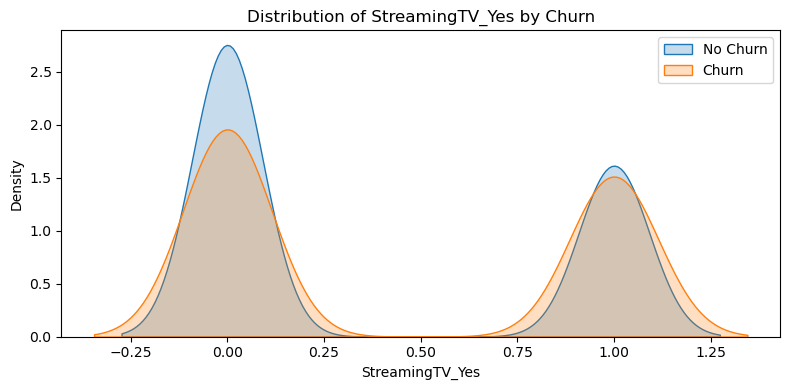

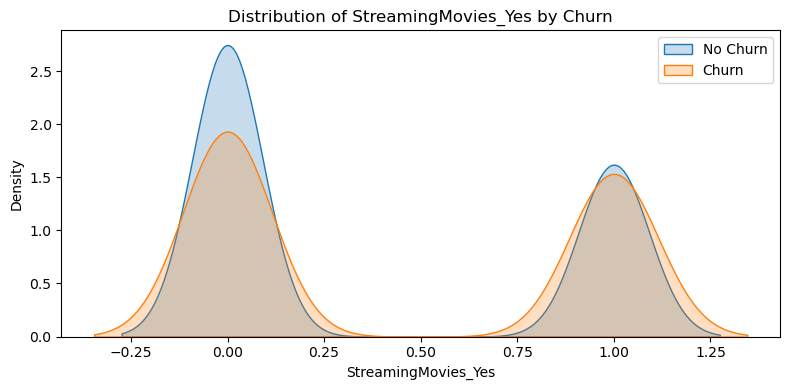

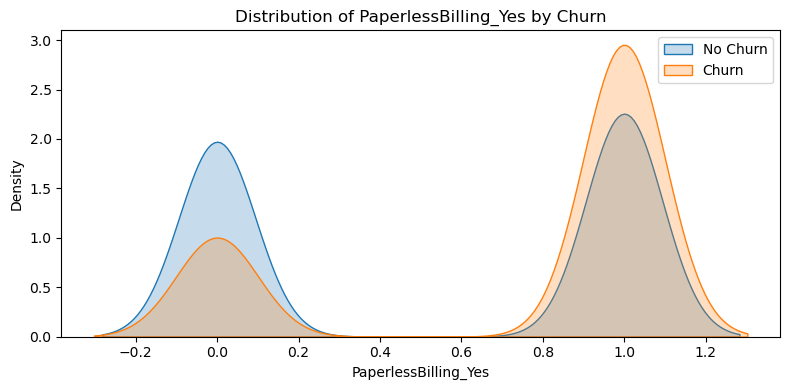

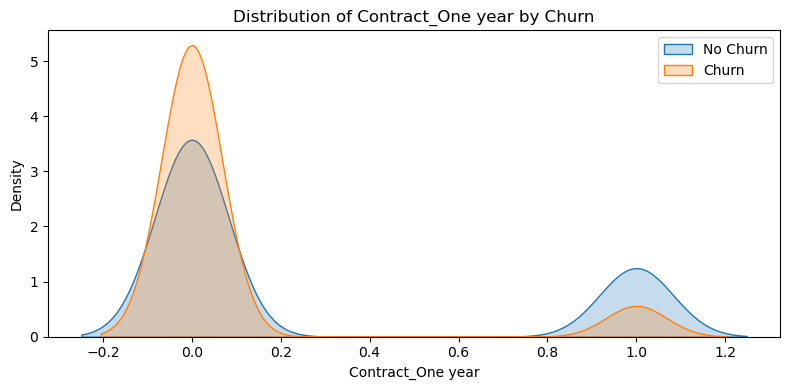

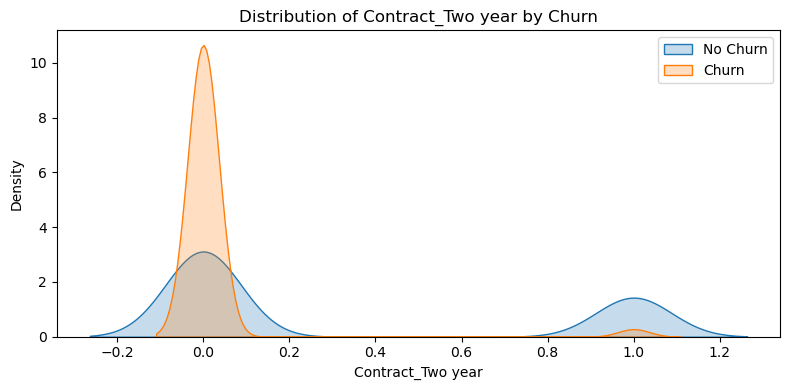

In [31]:
#KDE plots for each feature in realtion to the target variable.
for col in train_data.drop(columns='churn').columns:
    plt.figure(figsize=(8, 4))
    sn.kdeplot(data=train_data[train_data['churn'] == 0], x=col, label='No Churn', fill=True)
    sn.kdeplot(data=train_data[train_data['churn'] == 1], x=col, label='Churn', fill=True)
    plt.title(f'Distribution of {col} by Churn')
    plt.legend()
    plt.tight_layout()
    plt.show()

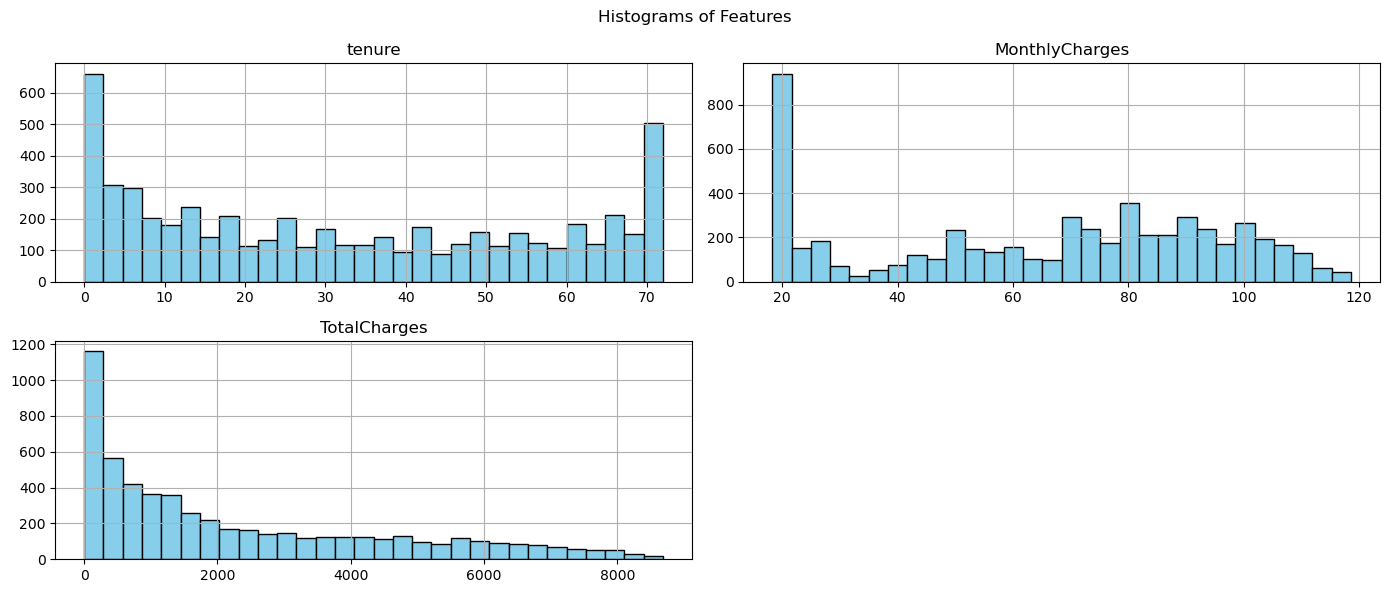

In [32]:
# Plot histograms
features = ['tenure', 'MonthlyCharges', 'TotalCharges']
train_data[features].hist(bins=30, figsize=(14, 6), edgecolor='black', color='skyblue')
#train_data.hist(figsize=(16, 12), bins= 100, edgecolor='black')
plt.suptitle('Histograms of Features')
plt.tight_layout()
plt.show()

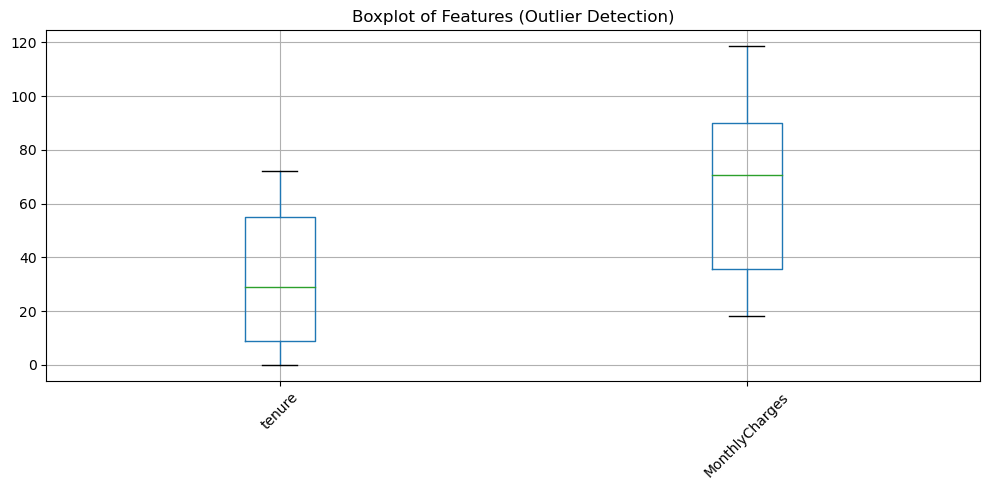

In [33]:
#Boxplot to visualize he value distribution in contious features in the dataset
plt.figure(figsize=(10, 5))
features = ['tenure', 'MonthlyCharges'] # 'tenure', 'MonthlyCharges' & 'TotalCharges'
train_data[features].boxplot(rot=90)
plt.title('Boxplot of Features (Outlier Detection)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
train_data['churn'].value_counts()

0    4138
1    1496
Name: churn, dtype: int64

In [35]:
from sklearn.preprocessing import StandardScaler
continuous_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# log1p transform to reduce skewness
X_train[continuous_features] = np.log1p(X_train[continuous_features])
X_test[continuous_features] = np.log1p(X_test[continuous_features])

# Initialize the scaler
scaler = StandardScaler()
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])


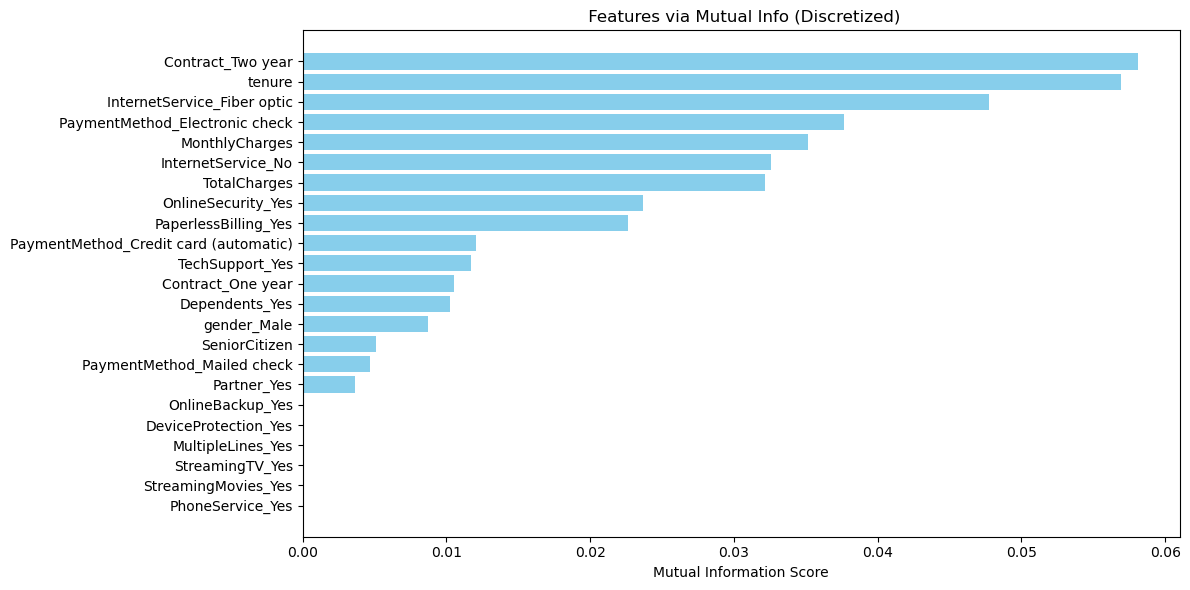

In [36]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import KBinsDiscretizer

# Discretize continuous features to improve MI stability
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_train_discretized = discretizer.fit_transform(X_train)

# SelectKBest with Mutual Information
selector = SelectKBest(score_func=mutual_info_classif, k='all')
selector.fit(X_train_discretized, y_train)

# create DataFrame of scores
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

top_features = feature_scores
plt.figure(figsize=(12, 6))
plt.barh(top_features['Feature'], top_features['Score'], color='skyblue')
plt.xlabel("Mutual Information Score")
plt.title(f" Features via Mutual Info (Discretized)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [37]:
from sklearn.feature_selection import  RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier

k = 20 
random_state = 42

# RFE with Logistic Regression
rfe_estimator = LogisticRegression(max_iter=1000, random_state=random_state)
rfe_selector = RFE(estimator=rfe_estimator, n_features_to_select=k)
rfe_selector.fit(X_train, y_train)
rfe_features = X_train.columns[rfe_selector.get_support()]

# Random Forest (Using feature importances)
rf_estimator = RandomForestClassifier(random_state=random_state)
rf_estimator.fit(X_train, y_train)
rf_importances = pd.Series(rf_estimator.feature_importances_, index=X_train.columns)
rf_features = rf_importances.sort_values(ascending=False).head(k).index

# Lasso (L1 regularization for embedded feature selection)
lasso = LassoCV(cv=5, random_state=random_state).fit(X_train, y_train)
lasso_coef = pd.Series(np.abs(lasso.coef_), index=X_train.columns)
lasso_features = lasso_coef.sort_values(ascending=False).head(k).index

# Results
feature_sets = pd.DataFrame({
    'RFE': pd.Series(rfe_features),
    'Random Forest': pd.Series(rf_features),
    'Lasso': pd.Series(lasso_features)
})

print("🔍 Top k Features from Different Selection Methods:")
print(feature_sets)


🔍 Top k Features from Different Selection Methods:
                               RFE                   Random Forest  \
0                    SeniorCitizen                    TotalCharges   
1                           tenure                  MonthlyCharges   
2                   MonthlyCharges                          tenure   
3                     TotalCharges     InternetService_Fiber optic   
4                      Partner_Yes  PaymentMethod_Electronic check   
5                   Dependents_Yes               Contract_Two year   
6                 PhoneService_Yes                     gender_Male   
7                MultipleLines_Yes            PaperlessBilling_Yes   
8   PaymentMethod_Electronic check              OnlineSecurity_Yes   
9       PaymentMethod_Mailed check               Contract_One year   
10     InternetService_Fiber optic                     Partner_Yes   
11              InternetService_No                OnlineBackup_Yes   
12              OnlineSecurity_Yes     

In [38]:
#Common found features from the 3 feature selection tech above:
common_features = list(
    set(rfe_features) &
    set(rf_features) &
    set(lasso_features)
)

print(f"✅ Common top features across all methods: {common_features}")
X_train_sel = X_train[common_features]
X_test_sel = X_test[common_features]


✅ Common top features across all methods: ['InternetService_No', 'PaymentMethod_Electronic check', 'MonthlyCharges', 'Dependents_Yes', 'PaperlessBilling_Yes', 'TechSupport_Yes', 'MultipleLines_Yes', 'OnlineSecurity_Yes', 'tenure', 'Contract_Two year', 'OnlineBackup_Yes', 'SeniorCitizen', 'InternetService_Fiber optic', 'Contract_One year', 'StreamingTV_Yes', 'StreamingMovies_Yes']


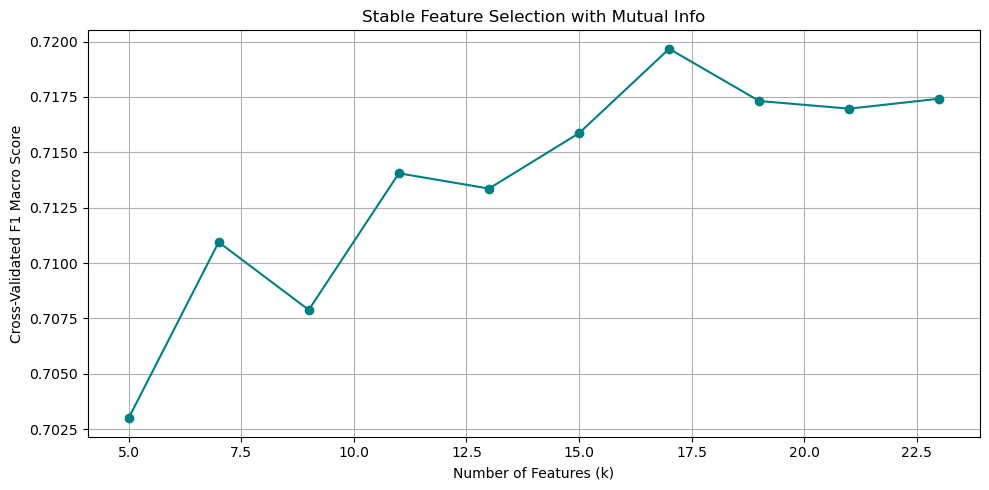

Best k value: 17
Top 17 features selected:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'Contract_One year', 'Contract_Two year']


In [39]:
from sklearn.model_selection import cross_val_score
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_train_discretized = discretizer.fit_transform(X_train)

# Evaluate different k values
scores = []
k_values = list(range(5, X_train_discretized.shape[1] + 1, 2))

for k in k_values:
    selector = SelectKBest(mutual_info_classif, k=k)
    X_new = selector.fit_transform(X_train_discretized, y_train)
    model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
    score = cross_val_score(model, X_new, y_train, cv=5, scoring='f1_macro').mean()
    scores.append(score)

# Plotting results
plt.figure(figsize=(10, 5))
plt.plot(k_values, scores, marker='o', color='teal')
plt.xlabel("Number of Features (k)")
plt.ylabel("Cross-Validated F1 Macro Score")
plt.title("Stable Feature Selection with Mutual Info")
plt.grid(True)
plt.tight_layout()
plt.show()

# Report best k
best_k = k_values[np.argmax(scores)]
print(f"Best k value: {best_k}")
top_k_features = X_train.columns[selector.get_support()]
print(f"Top {best_k} features selected:")
print(top_k_features.to_list())

In [40]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Dictionary of models to test
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', probability=True, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

print(" ~ All features and no data balancing model Comparison Results: ~\n")

for name, model in models.items():
    pipeline = ImbPipeline([
        ('clf', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"\n >> Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


 ~ All features and no data balancing model Comparison Results: ~


 >> Model: Random Forest
Accuracy: 0.7892
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.65      0.45      0.53       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409


 >> Model: Logistic Regression
Accuracy: 0.8119
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.67      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409


 >> Model: Gradient Boosting
Accuracy: 0.8070
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.67      0.

In [41]:
#Selected features and no data balancing model Comparison Results
print("~ Selected features and no data balancing model Comparison Results: ~\n")

for name, model in models.items():
    pipelines = ImbPipeline([
        ('clf', model)
    ])

    pipelines.fit(X_train_sel, y_train)
    y_predy = pipelines.predict(X_test_sel)

    print(f"\n >> Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_predy):.4f}")
    print(classification_report(y_test, y_predy))


~ Selected features and no data balancing model Comparison Results: ~


 >> Model: Random Forest
Accuracy: 0.7921
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.64      0.49      0.56       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409


 >> Model: Logistic Regression
Accuracy: 0.8176
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


 >> Model: Gradient Boosting
Accuracy: 0.8162
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69    

In [42]:
# All feature with data balancing technique model Comparison Results
print("~ All feature with data balancing technique model Comparison Results: `\n")

for name, model in models.items():
    pipeline = ImbPipeline([
        ('SMOTE-Tomek', SMOTETomek(random_state=42)),
        ('clf', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"\n >> Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


~ All feature with data balancing technique model Comparison Results: `


 >> Model: Random Forest
Accuracy: 0.7793
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1036
           1       0.57      0.66      0.61       373

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409


 >> Model: Logistic Regression
Accuracy: 0.7644
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1036
           1       0.54      0.80      0.64       373

    accuracy                           0.76      1409
   macro avg       0.73      0.78      0.73      1409
weighted avg       0.81      0.76      0.78      1409


 >> Model: Gradient Boosting
Accuracy: 0.7644
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1036
           1       0.54  

In [43]:
#Selected features with data balancing technique model Comparison Results
print("~ Selected features with data balancing technique model Comparison Results: ~\n")

for name, model in models.items():
    pipelines = ImbPipeline([
        ('SMOTE-Tomek', SMOTETomek(random_state=42)),
        ('clf', model)
    ])

    pipelines.fit(X_train_sel, y_train)
    y_predy = pipelines.predict(X_test_sel)

    print(f"\n >> Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_predy):.4f}")
    print(classification_report(y_test, y_predy))


~ Selected features with data balancing technique model Comparison Results: ~


 >> Model: Random Forest
Accuracy: 0.7757
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1036
           1       0.56      0.67      0.61       373

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409


 >> Model: Logistic Regression
Accuracy: 0.7509
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.82      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409


 >> Model: Gradient Boosting
Accuracy: 0.7608
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1036
           1       

In [44]:
#Model with Class Weight Adjustment
# Dictionary of models with class weights where supported
models = {
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),  # No class_weight support
    'SVM (RBF)': SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42),
    'Naive Bayes': GaussianNB(),  # No class_weight support
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'KNN': KNeighborsClassifier()  # No class_weight support
}

print("~ Model Comparison Results (with Class Weight Adjustment): ~\n")

for name, model in models.items():
    pipeline = ImbPipeline([
        ('clf', model)
    ])

    pipeline.fit(X_train_sel, y_train)
    y_pred = pipeline.predict(X_test_sel)

    print(f"\n >> Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


~ Model Comparison Results (with Class Weight Adjustment): ~


 >> Model: Random Forest
Accuracy: 0.7949
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1036
           1       0.65      0.49      0.56       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409


 >> Model: Logistic Regression
Accuracy: 0.7594
              precision    recall  f1-score   support

           0       0.92      0.73      0.82      1036
           1       0.53      0.83      0.65       373

    accuracy                           0.76      1409
   macro avg       0.73      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409


 >> Model: Gradient Boosting
Accuracy: 0.8162
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56   

In [45]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

mod = {
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis()
}

print("~ other Models with all features- Comparison Results: ~\n")

for name, model in mod.items():
    pipelines = ImbPipeline([
        ('clf', model)
    ])

    pipelines.fit(X_train, y_train)
    y_predy = pipelines.predict(X_test)

    print(f"\n >> Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_predy):.4f}")
    print(classification_report(y_test, y_predy))

~ other Models with all features- Comparison Results: ~


 >> Model: XGBoost
Accuracy: 0.7949
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.64      0.52      0.57       373

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418

C:\Users\merli\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:16:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 >> Model: CatBoost
Accuracy: 0.8084
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.68      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409


 >> Model: Bagging
Accuracy: 0.7807
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1036
           1       0.63      0.43      0.51       373

    accuracy                           0.78      1409
   macro avg       0.72      0.67      0.68      1409
weighted avg       0.76      0.78      0.77      1409


 >> Model: Extra Trees
Accuracy: 0.7835
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1036
           1       0.62      0.47      0.53       373

    accuracy                           0.78      1409
   macro avg

C:\Users\merli\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [46]:
#Other models with selected features
print("~ Other models with selected features -  Comparison Results: ~\n")

for name, model in models.items():
    pipelines = ImbPipeline([
        ('clf', model)
    ])

    pipelines.fit(X_train_sel, y_train)
    y_predy = pipelines.predict(X_test_sel)

    print(f"\n >> Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_predy):.4f}")
    print(classification_report(y_test, y_predy))

~ Other models with selected features -  Comparison Results: ~


 >> Model: Random Forest
Accuracy: 0.7949
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1036
           1       0.65      0.49      0.56       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409


 >> Model: Logistic Regression
Accuracy: 0.7594
              precision    recall  f1-score   support

           0       0.92      0.73      0.82      1036
           1       0.53      0.83      0.65       373

    accuracy                           0.76      1409
   macro avg       0.73      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409


 >> Model: Gradient Boosting
Accuracy: 0.8162
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56 

📘 Default Model:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



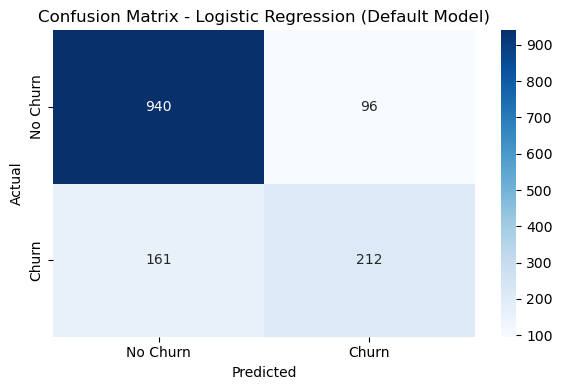

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Train Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_sel, y_train)

# Evaluate
y_pred = model.predict(X_test_sel)
print("📘 Default Model:")
print(classification_report(y_test, y_pred))

# Plot heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])

plt.title('Confusion Matrix - Logistic Regression (Default Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [50]:
from sklearn.model_selection import StratifiedKFold

model = LogisticRegression(max_iter=1000, random_state=42)  
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train_sel, y_train, cv=cv, scoring='f1_macro')
print(f"Mean F1 Macro: {scores.mean():.4f}")
print(f"All Scores: {scores}")


Mean F1 Macro: 0.7293
All Scores: [0.70213863 0.7542281  0.73919703 0.7335814  0.71744981]


In [51]:
#Default model
model_default = LogisticRegression(max_iter=1000)
model_default.fit(X_train_sel, y_train)
y_pred_default = model_default.predict(X_test_sel)

#Balanced model
model_weighted = LogisticRegression(max_iter=1000, class_weight='balanced')
model_weighted.fit(X_train_sel, y_train)
y_pred_weighted = model_weighted.predict(X_test_sel)

print(" Default Model:")
print(classification_report(y_test, y_pred_default))

print("\n Balanced Model:")
print(classification_report(y_test, y_pred_weighted))


 Default Model:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


 Balanced Model:
              precision    recall  f1-score   support

           0       0.92      0.73      0.82      1036
           1       0.53      0.83      0.65       373

    accuracy                           0.76      1409
   macro avg       0.73      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



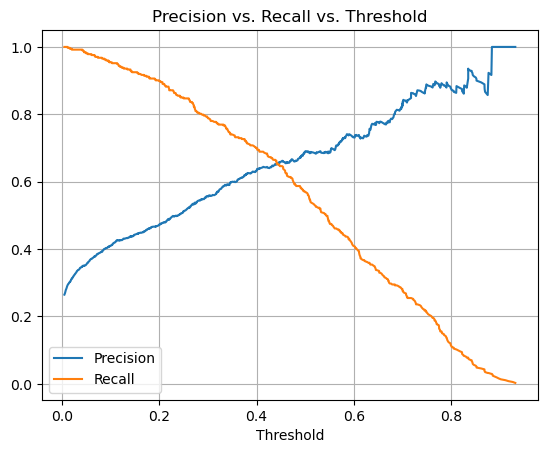

In [52]:
from sklearn.metrics import precision_recall_curve

model = LogisticRegression(max_iter=1000)
model.fit(X_train_sel, y_train)

# Get prediction probabilities
y_proba = model.predict_proba(X_test_sel)[:, 1]

# Compute precision-recall pairs
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Plot
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.title("Precision vs. Recall vs. Threshold")
plt.legend()
plt.grid(True)
plt.show()


In [53]:
from sklearn.metrics import f1_score
y_proba = model.predict_proba(X_test_sel)[:, 1]

# PR curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Compute F1 for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)  # add small number to avoid divide by zero

# Find best threshold
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]
print(f"✅ Best Threshold: {best_threshold:.2f} with F1-score: {f1_scores[best_idx]:.4f}")


✅ Best Threshold: 0.38 with F1-score: 0.6691


              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1036
           1       0.62      0.72      0.67       373

    accuracy                           0.81      1409
   macro avg       0.76      0.78      0.77      1409
weighted avg       0.82      0.81      0.81      1409



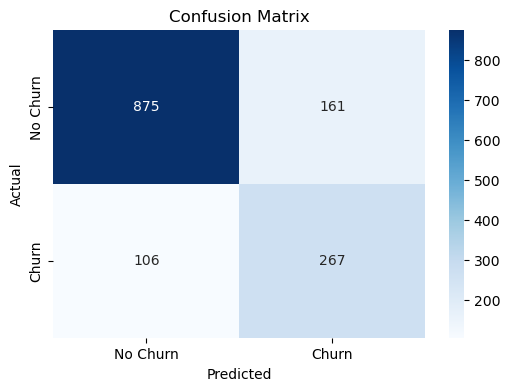

In [54]:
y_pred_optimal = (y_proba >= 0.38).astype(int)
print(classification_report(y_test, y_pred_optimal))
cm = confusion_matrix(y_test, y_pred_optimal)

# Create a heatmap using seaborn
plt.figure(figsize=(6,4))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
